In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
import math
import random

In [5]:
normalized_exp_link=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/normalized_expression_DUBStepR_3_2.csv",sep=",",low_memory=False)
exp_trans=normalized_exp_link.set_index('gene').transpose().reset_index()
del normalized_exp_link
exp_trans['index']=exp_trans['index'].str[:-2]
seurat_clusters_link=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/seurat_clusters_cells_integrated_DUBStepR_3_2.txt",sep=",")
#seurat_clusters_atac=pd.read_csv("seurat_clusters_cells_replicate_4_links_analysis.txt",sep=",")
seurat_clusters_link['barcodes']=seurat_clusters_link['barcodes'].str[:-2]
merged_exp_link=pd.merge(exp_trans,seurat_clusters_link,left_on='index',right_on='barcodes')
merged_mean_link=merged_exp_link.drop(['barcodes','Unnamed: 0','index'],axis=1).groupby('seurat_clusters').mean()
atac_counts_link=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC/combined_peaks/no_cell_removal/ATAC_peaks_counts_DUBStep_v3.csv",sep=",",low_memory=False)
#atac_trans_link=atac_counts_link.set_index('Unnamed: 0').transpose().reset_index()
atac_trans_link=atac_counts_link.set_index('gene').transpose().reset_index()
del atac_counts_link
atac_trans_link['index']=atac_trans_link['index'].str[:-2]
merged_atac_link=pd.merge(atac_trans_link,seurat_clusters_link,left_on='index',right_on='barcodes')
merged_atac_mean_link=merged_atac_link.drop(['Unnamed: 0','barcodes','index'],axis=1).groupby('seurat_clusters').mean()
merged_atac_mean_t_link=merged_atac_mean_link.reset_index().set_index('seurat_clusters').transpose().reset_index()
merged_mean_t_link=merged_mean_link.reset_index().set_index('seurat_clusters').transpose().reset_index()

In [6]:
annotation=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC/combined_peaks/no_cell_removal/linked_peaks.txt",sep="\s+",index_col=None)#.reset_index()


In [7]:
#annotation=pd.read_csv("/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/6.Integration/clean_run_04_12_2023/round_2/ATAC/combined_peaks/no_cell_removal/linked_peaks.txt",sep="\s+",index_col=None)#.reset_index()
#annotation['start']=annotation['start'].astype(str)
#annotation['end']=annotation['end'].astype(str)
#annotation=annotation[annotation['peak_type']=='promoter']
#annotation['peak']=annotation['chrom']+'-'+annotation['start']+'-'+annotation['end']
#annotation=annotation[annotation['distance']==0.0]
#annotation=annotation.drop_duplicates(['gene'], keep='first')#.value_counts()
exp_annotation=pd.merge(merged_mean_t_link,annotation,left_on='index',right_on='gene')
all_annotation=pd.merge(exp_annotation,merged_atac_mean_t_link,left_on="peak",right_on="index")

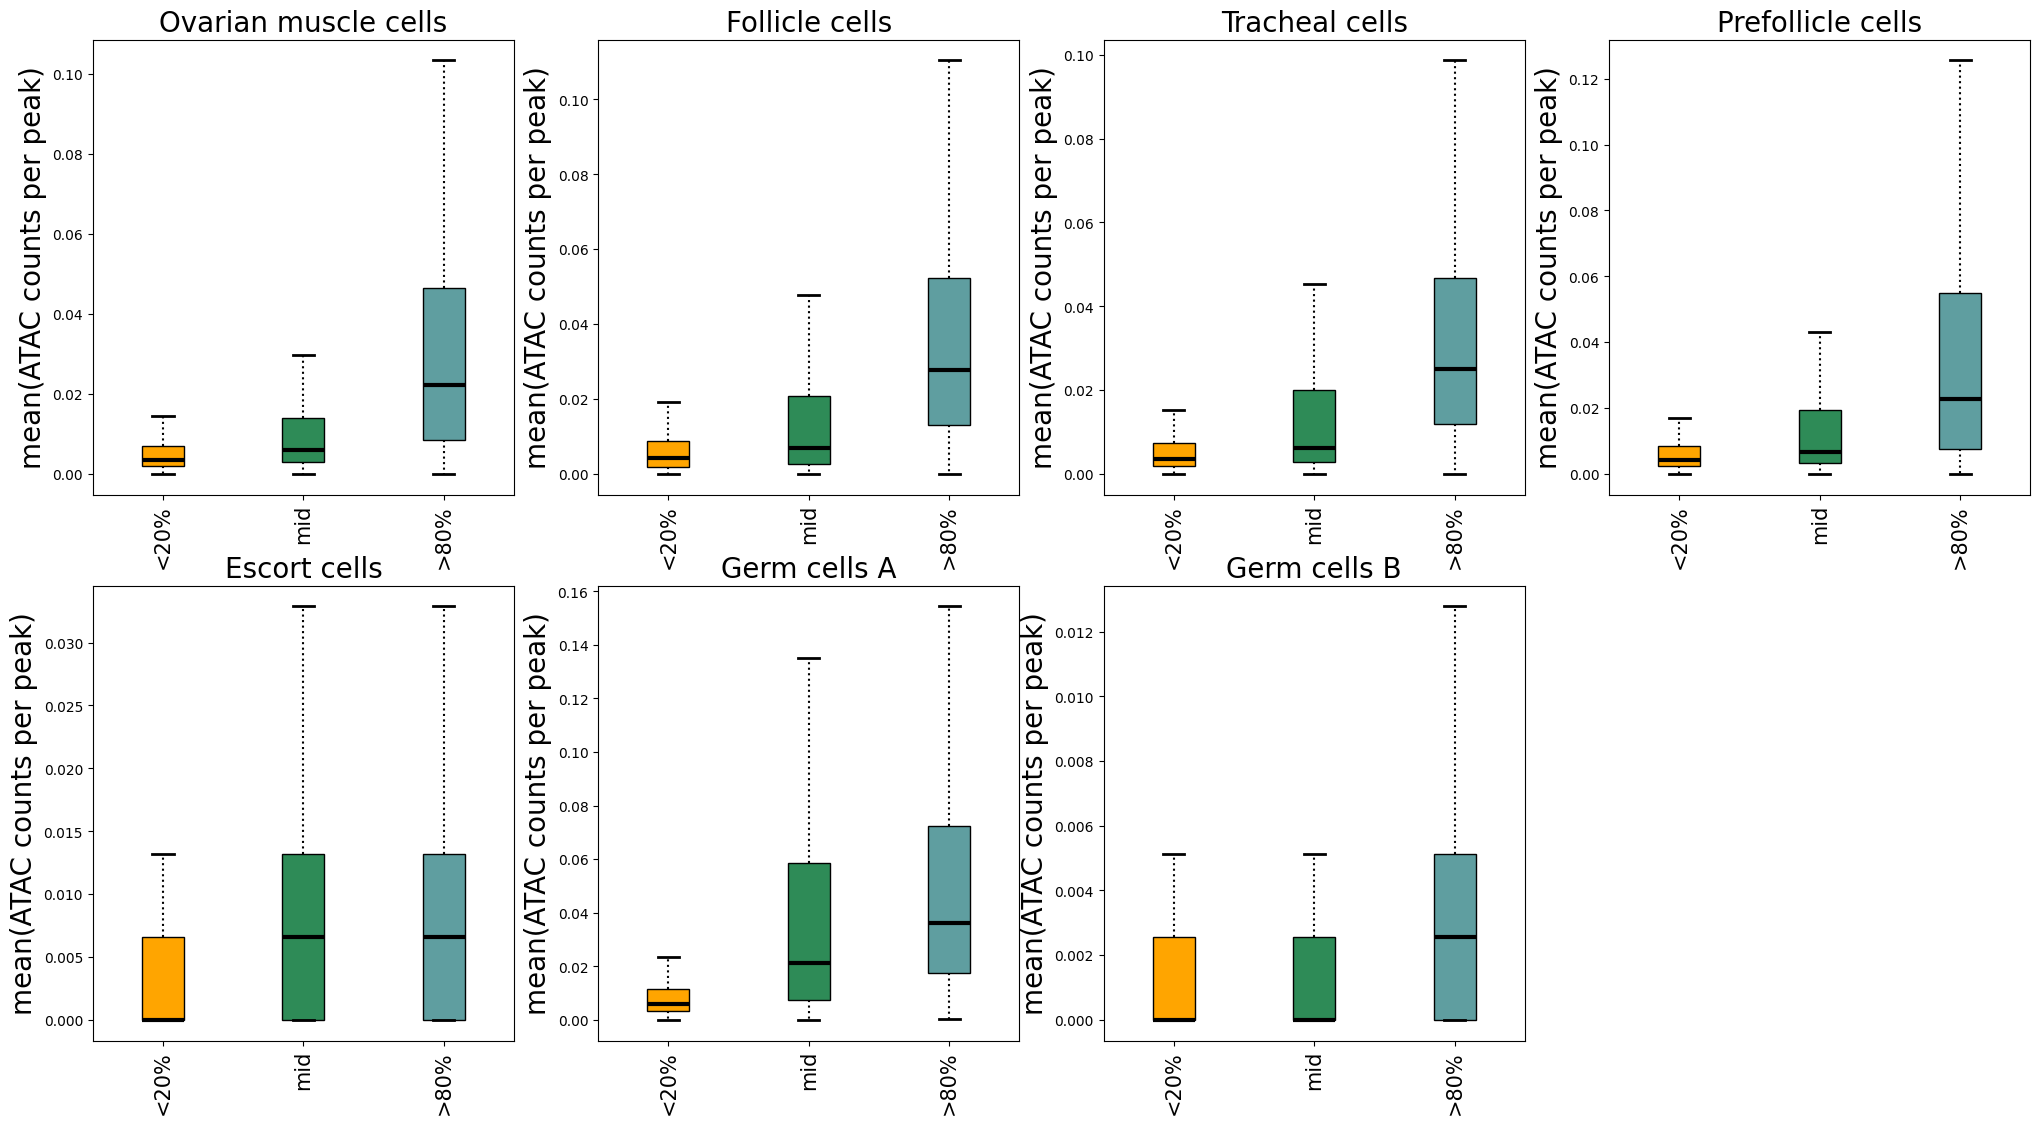

In [8]:
plt.figure(figsize=(25, 13))#, gridspec_kw={'hspace':0.6})
#fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(25, 13), gridspec_kw={'hspace':1})
plt.subplot(2,4,1)
lower=20
upper=80
gex='2_x'
atac='2_y'
bp=plt.boxplot([all_annotation[all_annotation[gex]<=np.percentile(all_annotation[gex],lower)][atac],all_annotation[(all_annotation[gex]>np.percentile(all_annotation[gex],lower))&(all_annotation[gex]<np.percentile(all_annotation[gex],upper))][atac],all_annotation[all_annotation[gex]>=np.percentile(all_annotation[gex],upper)][atac]],showfliers=False,patch_artist=True)
plt.title('Ovarian muscle cells',fontsize=20)
plt.ylabel('mean(ATAC counts per peak)',fontsize=20)
cluster=["<20%","mid",">80%"]
plt.xticks([1,2,3], cluster,rotation = 90,fontsize=15)
#plt.savefig('cluster_0_gex_vs_atac.png',bbox_inches='tight')
colors = ['orange','seagreen',"cadetblue"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
plt.subplot(242)
gex='4_x'
atac='4_y'
bp=plt.boxplot([all_annotation[all_annotation[gex]<=np.percentile(all_annotation[gex],lower)][atac],all_annotation[(all_annotation[gex]>np.percentile(all_annotation[gex],lower))&(all_annotation[gex]<np.percentile(all_annotation[gex],upper))][atac],all_annotation[all_annotation[gex]>=np.percentile(all_annotation[gex],upper)][atac]],showfliers=False,patch_artist=True)
plt.title('Follicle cells',fontsize=20)
plt.ylabel('mean(ATAC counts per peak)',fontsize=20)
cluster=["<20%","mid",">80%"]
plt.xticks([1,2,3], cluster,rotation = 90,fontsize=15)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
plt.subplot(243)
gex='0_x'
atac='0_y'
bp=plt.boxplot([all_annotation[all_annotation[gex]<=np.percentile(all_annotation[gex],lower)][atac],all_annotation[(all_annotation[gex]>np.percentile(all_annotation[gex],lower))&(all_annotation[gex]<np.percentile(all_annotation[gex],upper))][atac],all_annotation[all_annotation[gex]>=np.percentile(all_annotation[gex],upper)][atac]],showfliers=False,patch_artist=True)
plt.title('Tracheal cells',fontsize=20)
plt.ylabel('mean(ATAC counts per peak)',fontsize=20)
cluster=["<20%","mid",">80%"]
plt.xticks([1,2,3], cluster,rotation = 90,fontsize=15)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
plt.subplot(244)
gex='5_x'
atac='5_y'
bp=plt.boxplot([all_annotation[all_annotation[gex]<=np.percentile(all_annotation[gex],lower)][atac],all_annotation[(all_annotation[gex]>np.percentile(all_annotation[gex],lower))&(all_annotation[gex]<np.percentile(all_annotation[gex],upper))][atac],all_annotation[all_annotation[gex]>=np.percentile(all_annotation[gex],upper)][atac]],showfliers=False,patch_artist=True)
plt.title('Prefollicle cells',fontsize=20)
plt.ylabel('mean(ATAC counts per peak)',fontsize=20)
cluster=["<20%","mid",">80%"]
plt.xticks([1,2,3], cluster,rotation = 90,fontsize=15)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
plt.subplot(245)
gex='3_x'
atac='3_y'
bp=plt.boxplot([all_annotation[all_annotation[gex]<=np.percentile(all_annotation[gex],lower)][atac],all_annotation[(all_annotation[gex]>np.percentile(all_annotation[gex],lower))&(all_annotation[gex]<np.percentile(all_annotation[gex],upper))][atac],all_annotation[all_annotation[gex]>=np.percentile(all_annotation[gex],upper)][atac]],showfliers=False,patch_artist=True)
plt.title('Escort cells',fontsize=20)
plt.ylabel('mean(ATAC counts per peak)',fontsize=20)
cluster=["<20%","mid",">80%"]
plt.xticks([1,2,3], cluster,rotation = 90,fontsize=15)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
plt.subplot(246)
gex='1_x'
atac='1_y'
bp=plt.boxplot([all_annotation[all_annotation[gex]<=np.percentile(all_annotation[gex],lower)][atac],all_annotation[(all_annotation[gex]>np.percentile(all_annotation[gex],lower))&(all_annotation[gex]<np.percentile(all_annotation[gex],upper))][atac],all_annotation[all_annotation[gex]>=np.percentile(all_annotation[gex],upper)][atac]],showfliers=False,patch_artist=True)
plt.title('Germ cells A',fontsize=20)
plt.ylabel('mean(ATAC counts per peak)',fontsize=20)
cluster=["<20%","mid",">80%"]
plt.xticks([1,2,3], cluster,rotation = 90,fontsize=15)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
plt.subplot(247)
gex='6_x'
atac='6_y'
bp=plt.boxplot([all_annotation[all_annotation[gex]<=np.percentile(all_annotation[gex],lower)][atac],all_annotation[(all_annotation[gex]>np.percentile(all_annotation[gex],lower))&(all_annotation[gex]<np.percentile(all_annotation[gex],upper))][atac],all_annotation[all_annotation[gex]>=np.percentile(all_annotation[gex],upper)][atac]],showfliers=False,patch_artist=True)
plt.title('Germ cells B',fontsize=20)
plt.ylabel('mean(ATAC counts per peak)',fontsize=20)
cluster=["<20%","mid",">80%"]
plt.xticks([1,2,3], cluster,rotation = 90,fontsize=15)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color) 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='black',
               linewidth = 3)
#plt.subplot(548)
plt.savefig('/nfs/scistore18/vicosgrp/melkrewi/Project_snRNA_ovaries_with_W/8.Jupyter_notebooks_for_submission/review_figures/all_clusters_gex_vs_atac_20_03_2024_links_v3.png',bbox_inches='tight',dpi=1000)